An e-commerce company based in the United Kingdom would like to extract some insights from their customer data for the past year. They would like to find out if there are specific areas they should focus on or improve to increase their revenue. They have hired you to help them figure out!

In this notebook we seek to answer a few questions:

1: Sales performance analysis
- What are the sales or revenue trend over time?
- Which countries contributed the most revenue?
- What are the top selling products?
- How many refunds were there?

2: Customer behavior analysis
- How many unique customers were there in the last year?
- Which customers generated the highest revenue?
- Which customers contributed the most refunds?

3: What are some strategies we can utilise to potentially improve sales?

#### Importing relevant libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import locale

#### Data preprocessing

In [3]:
# reading csv file
df = pd.read_csv('data-2.csv')

In [4]:
# quick quantitative summary of data in dataset
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
# taking a look at top 5 rows in dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
# concise summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
# creation of missing values dataframe for visualisation
df_msn = pd.DataFrame(df.isna().sum())

df_msn

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [8]:
# removing NaN values in CustomerID
df.dropna(subset=['CustomerID'], inplace=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [9]:
df.drop(df.query('Description in ["POSTAGE", "CARRIAGE", "Discount", "DOTCOM POSTAGE", "CRUK Commission", "Manual"]').index, axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404925 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    404925 non-null  object 
 1   StockCode    404925 non-null  object 
 2   Description  404925 non-null  object 
 3   Quantity     404925 non-null  int64  
 4   InvoiceDate  404925 non-null  object 
 5   UnitPrice    404925 non-null  float64
 6   CustomerID   404925 non-null  float64
 7   Country      404925 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.8+ MB


In [10]:
# display unique values in Country column
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [11]:
# dropping Unspecified values in Country column
df.drop(df[df['Country'] == "Unspecified"].index, inplace=True)


In [12]:
# adjusting initials of countries to proper names
df.loc[df['Country'] == "EIRE", "Country"] = "Ireland"
df.loc[df['Country'] == "USA", "Country"] = "United States of America"
df.loc[df['Country'] == "RSA", "Country"] = "South Africa"

In [13]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'Ireland', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Brazil', 'United States of America', 'European Community',
       'Bahrain', 'Malta', 'South Africa'], dtype=object)

In [14]:
# changing datatypes of InvoiceDate to datetime, CustomerID to integer
df = df.astype({'InvoiceDate': 'datetime64[ns]', 'CustomerID':'int64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404681 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    404681 non-null  object        
 1   StockCode    404681 non-null  object        
 2   Description  404681 non-null  object        
 3   Quantity     404681 non-null  int64         
 4   InvoiceDate  404681 non-null  datetime64[ns]
 5   UnitPrice    404681 non-null  float64       
 6   CustomerID   404681 non-null  int64         
 7   Country      404681 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.8+ MB


In [15]:
# checking negative values in Quantity
df.query('Quantity < 0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397,United Kingdom
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [16]:
# adding revenue column to dataset
df['Revenue'] = abs(df['Quantity'] * df['UnitPrice'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [17]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month_name()
df['Day'] = df['InvoiceDate'].dt.day_name()
df['Date'] = df[['Month', 'Year']].astype(str).apply('-'.join, axis=1)
df['Hour'] = df['InvoiceDate'].dt.hour

In [18]:
df['Day'].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Sunday', 'Monday', 'Tuesday'],
      dtype=object)

### 1. Sales Analysis

In [19]:
# removing invoices starting with C as those are probably refunds
sales = df[~df['InvoiceNo'].str.contains("C")]


#### 1.1 Sales trends

In [20]:
# revenue over the months
monthly_sales_trend = sales.groupby(['Date'], as_index=False)['Revenue'].sum().round(2)
monthly_sales_trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     13 non-null     object 
 1   Revenue  13 non-null     float64
dtypes: float64(1), object(1)
memory usage: 340.0+ bytes


In [21]:
# function to sort the dataframe
def month_sorter(df):
    df["Date"] = df["Date"].astype('datetime64[ns]')
    #sorting values by date
    df.sort_values(by='Date', ascending=True, inplace=True)
    #converting back to string values
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month_name()
    df['Month'] = df[['Month', 'Year']].astype(str).apply('-'.join, axis=1)
    df.drop(['Date','Year'], axis=1, inplace=True)
    df = df[['Month','Revenue']]

In [22]:
month_sorter(monthly_sales_trend)
monthly_sales_trend

,Revenue,Month
2,567505.72,December-2010
5,564041.64,January-2011
4,443346.02,February-2011
8,584562.85,March-2011
0,454982.81,April-2011
9,659644.22,May-2011
7,654246.78,June-2011
6,591933.42,July-2011
1,636276.21,August-2011
12,940930.81,September-2011


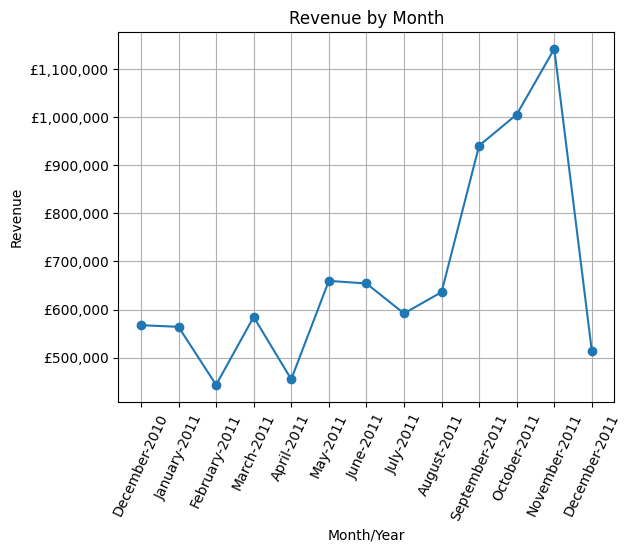

In [23]:
#plotting line graph
fig, ax = plt.subplots()
ax.plot(monthly_sales_trend['Month'], monthly_sales_trend["Revenue"], marker='o')

ax.set_xlabel('Month/Year')
ax.set_ylabel('Revenue')
ax.set_title('Revenue by Month')

fmt = '£{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

plt.xticks(rotation=65)
plt.grid(True)
plt.show()

In [24]:
# revenue per days in a week
daily_sales_trend = sales.groupby(['Day'], as_index=False)['Revenue'].sum().round(2)
daily_sales_trend

,Day,Revenue
0,Friday,1462648.67
1,Monday,1328726.58
2,Sunday,786762.70
3,Thursday,1942303.77
4,Tuesday,1674571.27
5,Wednesday,1563551.59


In [25]:
# sorting by day
daily_sales_trend['Order'] = ['5', '1', '6', '4', '2', '3']
daily_sales_trend.sort_values(by='Order', inplace=True)
daily_sales_trend

,Day,Revenue,Order
1,Monday,1328726.58,1
4,Tuesday,1674571.27,2
5,Wednesday,1563551.59,3
3,Thursday,1942303.77,4
0,Friday,1462648.67,5
2,Sunday,786762.70,6


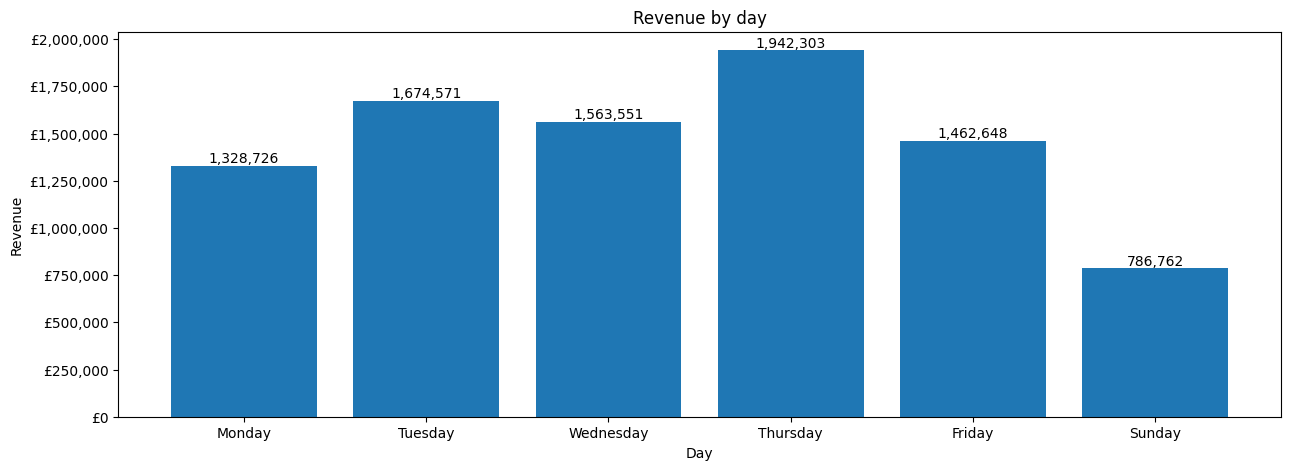

In [26]:
# plotting bar chart for daily sales
fig, ax = plt.subplots(1,1,figsize=(15,5))
rD = ax.bar(daily_sales_trend['Day'], daily_sales_trend['Revenue'])
ax.set_xlabel('Day')
ax.set_ylabel('Revenue')
ax.set_title('Revenue by day')

#setting up and applying formatting string syntax for y axis
fmt = '£{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

#setting locale for thousands separator
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

#function to format label with thousands separator
def format_label(value):
    return locale.format_string("%d", value, grouping=True)

#add bar labels
for bar in rD:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        format_label(height),
        ha='center',
        va='bottom'
    )

#add rotation for x labels
plt.show()

In [27]:
# revenue by hour
hourly_sales_trend = sales.groupby(['Hour'], as_index=False)['Revenue'].sum().round(2)
hourly_sales_trend

,Hour,Revenue
0,6,4.25
1,7,30469.21
2,8,277662.63
3,9,829042.32
4,10,1243832.58
5,11,1087369.16
6,12,1366001.91
7,13,1142366.12
8,14,971412.98
9,15,948993.18


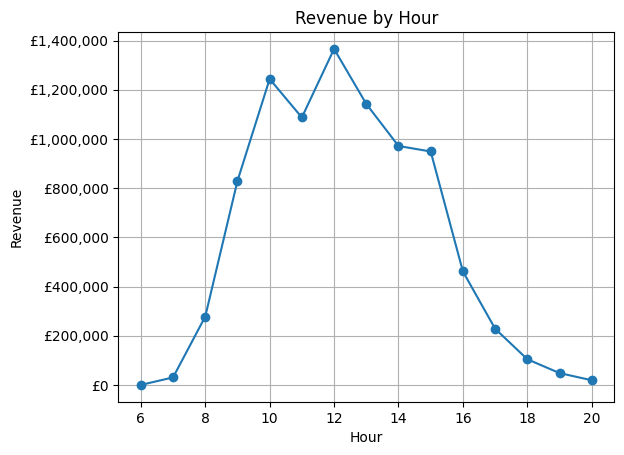

In [28]:
#plotting line graph
fig, ax = plt.subplots()
ax.plot(hourly_sales_trend['Hour'], hourly_sales_trend["Revenue"], marker='o')

ax.set_xlabel('Hour')
ax.set_ylabel('Revenue')
ax.set_title('Revenue by Hour')

fmt = '£{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 


plt.grid(True)
plt.show()

In [29]:
sales.to_csv('sales.csv', index=False)

#### 1.2 Top contributing countries

In [30]:
# revenue by country
country = sales.groupby(['Country'], as_index=False)['Revenue'].sum().round(2)
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  36 non-null     object 
 1   Revenue  36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 708.0+ bytes


In [31]:
country.sort_values(by='Revenue', ascending=False, inplace=True)
countrytop10 = country.head(10)

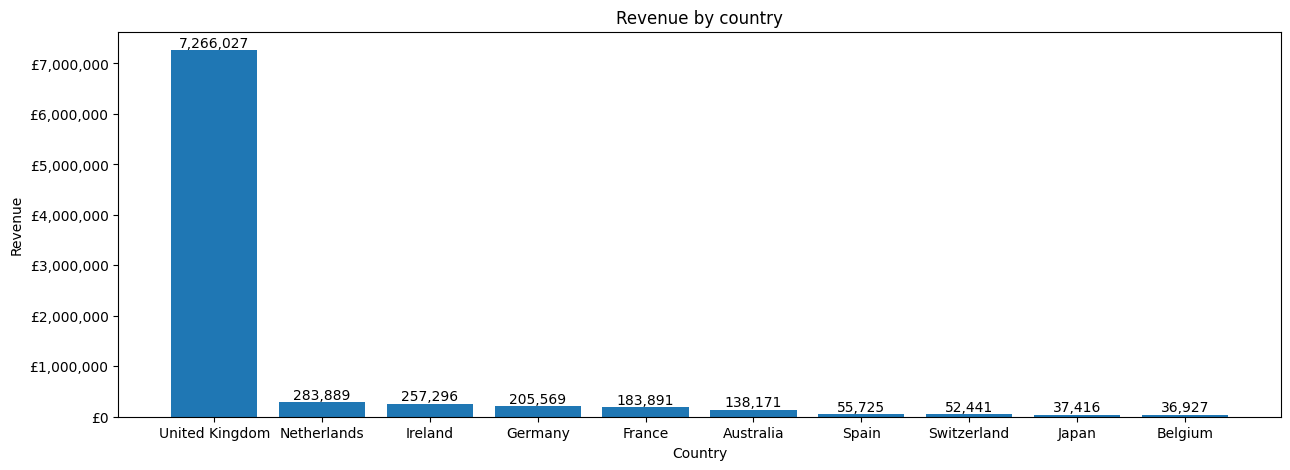

In [32]:
# plotting bar chart for revenue by country
fig, ax = plt.subplots(1,1,figsize=(15,5))
rD = ax.bar(countrytop10['Country'], countrytop10['Revenue'])
ax.set_xlabel('Country')
ax.set_ylabel('Revenue')
ax.set_title('Revenue by country')

#setting up and applying formatting string syntax for y axis
fmt = '£{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

#setting locale for thousands separator
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

#function to format label with thousands separator
def format_label(value):
    return locale.format_string("%d", value, grouping=True)

#add bar labels
for bar in rD:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        format_label(height),
        ha='center',
        va='bottom'
    )

#add rotation for x labels
plt.show()

#### 1.3 Top selling products

In [33]:
top_products = sales.groupby(['Description', 'StockCode'], as_index=False)['Quantity'].sum().round(2)
top_products.sort_values(by='Quantity', ascending=False, inplace=True)
top_products = top_products.head(20)

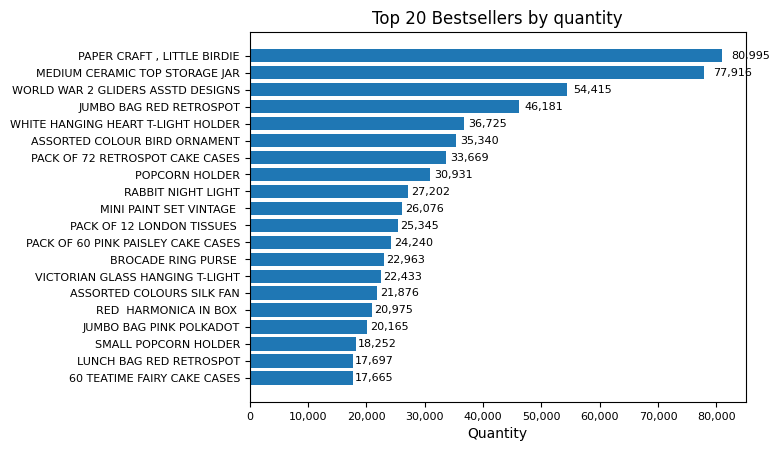

In [34]:

fig, ax = plt.subplots()
rP = ax.barh(top_products['Description'], top_products['Quantity'], align='center')

ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Quantity')
ax.set_title('Top 20 Bestsellers by quantity')
plt.xticks(fontsize=8)#
plt.yticks(fontsize=8)

fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#function to format label with thousands separator
def format_label(value):
    return locale.format_string("%d", value, grouping=True)

#add bar labels
for bar in rP:
    width = bar.get_width()  # Get revenue value
    ax.text(
        width + (width * 0.02),  # Slight offset to avoid overlap
        bar.get_y() + bar.get_height() / 2,
        format_label(width),
        ha='left',
        va='center',
        fontsize=8
    )

plt.show()

In [35]:
topsellers = sales.groupby(['Description','StockCode'], as_index=False)['Revenue'].sum().round(2)
topsellers.sort_values(by='Revenue', ascending=False, inplace=True)
topsellers = topsellers.head(20)

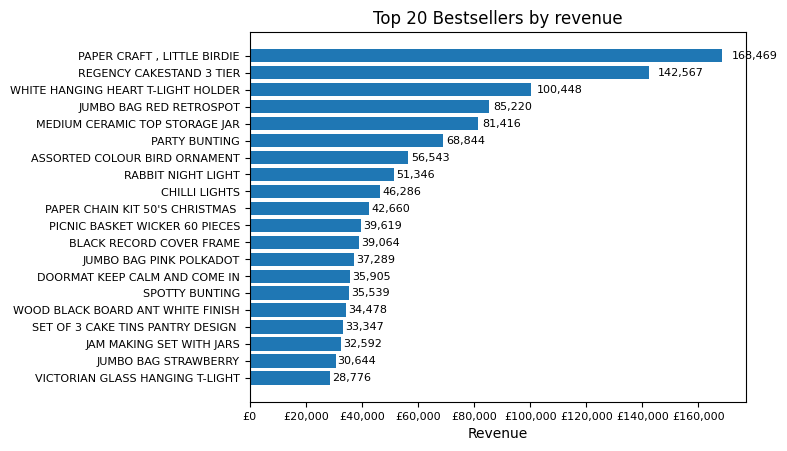

In [36]:

fig, ax = plt.subplots()
rP = ax.barh(topsellers['Description'], topsellers['Revenue'], align='center')

ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Revenue')
ax.set_title('Top 20 Bestsellers by revenue')
plt.xticks(fontsize=8)#
plt.yticks(fontsize=8)

fmt = '£{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

#function to format label with thousands separator
def format_label(value):
    return locale.format_string("%d", value, grouping=True)

#add bar labels
for bar in rP:
    width = bar.get_width()  # Get revenue value
    ax.text(
        width + (width * 0.02),  # Slight offset to avoid overlap
        bar.get_y() + bar.get_height() / 2,
        format_label(width),
        ha='left',
        va='center',
        fontsize=8
    )

plt.show()

In [37]:
refunds = df[df['InvoiceNo'].str.contains("C")]
refunds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8539 entries, 154 to 541717
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    8539 non-null   object        
 1   StockCode    8539 non-null   object        
 2   Description  8539 non-null   object        
 3   Quantity     8539 non-null   int64         
 4   InvoiceDate  8539 non-null   datetime64[ns]
 5   UnitPrice    8539 non-null   float64       
 6   CustomerID   8539 non-null   int64         
 7   Country      8539 non-null   object        
 8   Revenue      8539 non-null   float64       
 9   Year         8539 non-null   int32         
 10  Month        8539 non-null   object        
 11  Day          8539 non-null   object        
 12  Date         8539 non-null   object        
 13  Hour         8539 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(7)
memory usage: 934.0+ KB


In [38]:
refund_count = refunds.shape[0]
total_orders = df.shape[0]
refund_perc = (refund_count/total_orders)*100
print(f"Percentage of refunds: {refund_perc:.2f}%")

Percentage of refunds: 2.11%


In [39]:
refund_count_per_product = refunds.groupby('Description')['Quantity'].sum().abs()
refund_count_per_product.sort_values(ascending=False, inplace=True)
refund_count_per_product.head(20)

Description
PAPER CRAFT , LITTLE BIRDIE            80995
MEDIUM CERAMIC TOP STORAGE JAR         74494
ROTATING SILVER ANGELS T-LIGHT HLDR     9367
FAIRY CAKE FLANNEL ASSORTED COLOUR      3150
PINK BLUE FELT CRAFT TRINKET BOX        2617
WHITE HANGING HEART T-LIGHT HOLDER      2578
GIN + TONIC DIET METAL SIGN             2030
HERB MARKER BASIL                       1527
FELTCRAFT DOLL MOLLY                    1447
TEA TIME PARTY BUNTING                  1424
PAPER POCKET TRAVELING FAN              1385
WORLD WAR 2 GLIDERS ASSTD DESIGNS       1200
COLOUR GLASS. STAR T-LIGHT HOLDER       1174
JUMBO BAG RED RETROSPOT                 1115
HOME SWEET HOME MUG                     1052
PANTRY CHOPPING BOARD                    946
PLACE SETTING WHITE HEART                890
FELTCRAFT BUTTERFLY HEARTS               877
REGENCY CAKESTAND 3 TIER                 857
ASSORTED COLOURS SILK FAN                744
Name: Quantity, dtype: int64

### 2. Customer Behavior Analysis

- Which customers generated the highest revenue?
- Which customers contributed the most refunds?

#### 2.1 Unique customers

In [40]:
unique_cust = df['CustomerID'].nunique()
print(f"Total Unique Customers: {unique_cust}")

Total Unique Customers: 4359


In [41]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396142 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    396142 non-null  object        
 1   StockCode    396142 non-null  object        
 2   Description  396142 non-null  object        
 3   Quantity     396142 non-null  int64         
 4   InvoiceDate  396142 non-null  datetime64[ns]
 5   UnitPrice    396142 non-null  float64       
 6   CustomerID   396142 non-null  int64         
 7   Country      396142 non-null  object        
 8   Revenue      396142 non-null  float64       
 9   Year         396142 non-null  int32         
 10  Month        396142 non-null  object        
 11  Day          396142 non-null  object        
 12  Date         396142 non-null  object        
 13  Hour         396142 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(7)
memory usage: 42.3+ MB


#### 2.2 Top contributing customer

In [42]:
cust_revenue = sales.groupby(['CustomerID', 'Country'], as_index=False)['Revenue'].sum().round(2)
cust_revenue.sort_values(by='Revenue', ascending=False, inplace=True)
cust_revenue.head(20)

,CustomerID,Country,Revenue
1695,14646,Netherlands,279138.02
4203,18102,United Kingdom,259657.30
3731,17450,United Kingdom,194550.79
3012,16446,United Kingdom,168472.50
1885,14911,Ireland,136275.72
56,12415,Australia,124564.53
1340,14156,Ireland,116729.63
3774,17511,United Kingdom,91062.38
0,12346,United Kingdom,77183.60
2707,16029,United Kingdom,72882.09


#### 2.3 Customers with the most refunds

In [45]:
top_refund = refunds.groupby(['CustomerID', 'Country'], as_index=False)['Quantity'].sum().round(2)
top_refund.sort_values(by='Quantity', ascending=True, inplace=True)
top_refund.head(10)

,CustomerID,Country,Quantity
1095,16446,United Kingdom,-80995
0,12346,United Kingdom,-74215
960,15838,United Kingdom,-9360
929,15749,United Kingdom,-9014
999,16029,United Kingdom,-8004
167,12931,United Kingdom,-4427
623,14607,United Kingdom,-3768
706,14911,Ireland,-3331
1453,17949,United Kingdom,-2878
853,15482,United Kingdom,-2022
